# Open Data From JSON

In [11]:
import pandas as pd
import numpy as np
import os
import glob

In [12]:
path = 'crawl_json/'
frames = []
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.      
    with open(filename, encoding='utf-8', mode='r') as currentFile:
        frames.append(pd.read_json(currentFile, orient='index'))

df = pd.concat(frames)
df.drop(['authors', 'image_url', 'localpath', 'title_page', 'title_rss'], axis = 1, inplace = True)
df.head(3)

date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   

                                                 url  
0  http://neighbors.denverpost.com/viewtopic.php?...  
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...  
2  https://globalpublicsquare.blogs.cnn.com/2015/...

# Amount of articles that will be processed:

In [13]:
amount_of_articles = len(df["maintext"])
print(f"Amount of articles: {amount_of_articles}")

Amount of articles: 44914


# Preprocessing 

In [14]:
import re

In [15]:
df['id'] = df.index
df.head(3)

date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   

                                                 url  id  
0  http://neighbors.denverpost.com/viewtopic.php?...   0  
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...   1  
2  https://globalpublicsquare.blogs.cnn.com/2015/...   2

In [16]:
# Remove punctuation
df['maintext_prepro'] = \
df['maintext'].map(lambda x: re.sub('[,\.!?]', '', x))
# To lowercase
df['maintext_prepro'] = \
df['maintext_prepro'].map(lambda x: x.lower())

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
is_noun = lambda pos: pos[:2] == 'NN'
nouns = []

stemmer = WordNetLemmatizer()

print("Tokenizing all articles. This may take a while.")
df['tokenized_words'] = df['maintext'].apply(nltk.word_tokenize)
print("Finished tokenizing all articles. Continue with lemmatization & noun extraction.")


Tokenizing all articles. This may take a while.
Finished tokenizing all articles. Continue with lemmatization & noun extraction.


In [19]:
print("Lemmatization & noun extraction is running...")
for element in tqdm(df["tokenized_words"]):
	nouns.append(" ".join([stemmer.lemmatize(word) for (word, pos) in nltk.pos_tag(element) if is_noun(pos) and len(word) > 2]))    # joined as a single string per article

print("Finished lemmatization & noun extraction.")
df["maintext_nouns"] = nouns

Lemmatization & noun extraction is running...


100%|██████████| 44914/44914 [1:03:34<00:00, 11.77it/s]

Finished lemmatization & noun extraction.


In [20]:
df.head(3)

date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   

                                                 url  id  \
0  http://neighbors.denverpost.com/viewtopic.php?...   0   
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...   1   
2  https://globalpublicsquare.blogs.cnn.com/2015/...   2   

                                     maintext_prepro  \
0  neighbors » forums » general discussion » arti...   
1  brands and publishers seeking esports sponsors...   
2  for the latest updates to global public square...   

                                     tokenized_words  \
0  [Neighbors, », Forums, », General, Discussion,...   
1  [Brands, and, publishers, seeking, esports, sp...   
2  [For, the, latest, updates, to, Global, Public...   

                                      maintext_nouns  
0  Neighbors Forums General Discussion Article Ta...  
1  Brands publisher esports sponsorship opportuni...  
2  update Global Public Square show information F...

# Word Cloud

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=400, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Word Cloud All Words

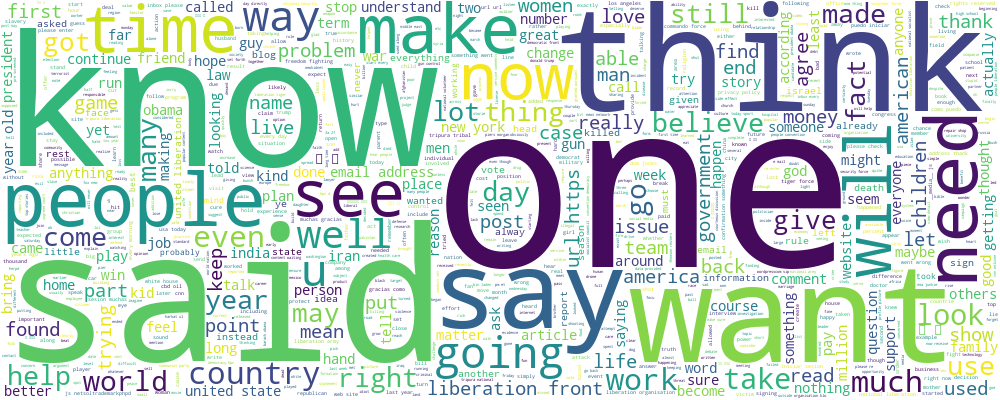

In [22]:
all_articles_string = ','.join(list(df['maintext_prepro'].values))
wordcloud.generate(all_articles_string)

wordcloud.to_image()

# Word Cloud Only Nouns

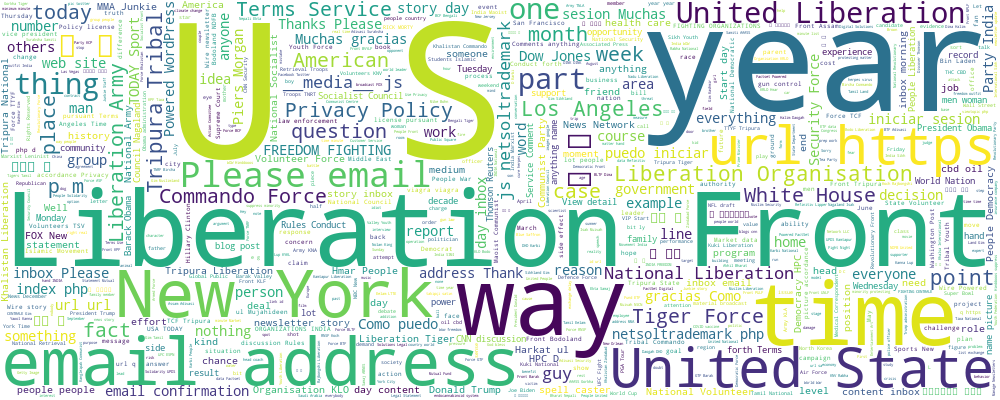

In [23]:
all_articles_nouns = ','.join(list(df['maintext_nouns'].values))
wordcloud.generate(all_articles_nouns)

wordcloud.to_image()

# Prepare data for LDA analysis

In [24]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import json
import regex

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stop_words = stopwords.words('english')

with open("stopwords.json") as jsonFile:
    jsonStopwords = json.load(jsonFile)

#extend stopwords if desired
stop_words.extend(jsonStopwords)  


In [26]:
#Tokenize Text
def sentence_to_words(sentences):
    for sent in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(sent, deacc=True))

In [27]:
#Remove Stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if (word not in stop_words)] for doc in texts]    #filtering

In [28]:
#Remove non alphanumeric words
def remove_non_alphanumeric(texts):
    return [[word for word in list if word.isalnum()] for list in texts]

In [29]:
def remove_non_ASCII(lists):
    for list in lists:
        for i, string in enumerate(list):
            if string.isascii():
                continue
            else:
                list.pop(i)
    return lists

In [30]:
maintext_data = df["maintext_nouns"].values.tolist()
df["maintext_ready"] = list(sentence_to_words(maintext_data))

maintext_ready = remove_stopwords(df["maintext_ready"].tolist())
maintext_ready = remove_non_ASCII(maintext_ready)
df["maintext_ready"]  = maintext_ready

In [31]:
df.head(3)

date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   

                                                 url  id  \
0  http://neighbors.denverpost.com/viewtopic.php?...   0   
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...   1   
2  https://globalpublicsquare.blogs.cnn.com/2015/...   2   

                                     maintext_prepro  \
0  neighbors » forums » general discussion » arti...   
1  brands and publishers seeking esports sponsors...   
2  for the latest updates to global public square...   

                                     tokenized_words  \
0  [Neighbors, », Forums, », General, Discussion,...   
1  [Brands, and, publishers, seeking, esports, sp...   
2  [For, the, latest, updates, to, Global, Public...   

                                      maintext_nouns  \
0  Neighbors Forums General Discussion Article Ta...   
1  Brands publisher esports sponsorship opportuni...   
2  update Global Public Square show information F...   

                                      maintext_ready  
0  [neighbors, forums, general, discussion, talk,...  
1  [brands, publisher, esports, sponsorship, oppo...  
2  [update, global, public, square, show, fareed,...

# Wordcloud of the ready-to-cluster articles

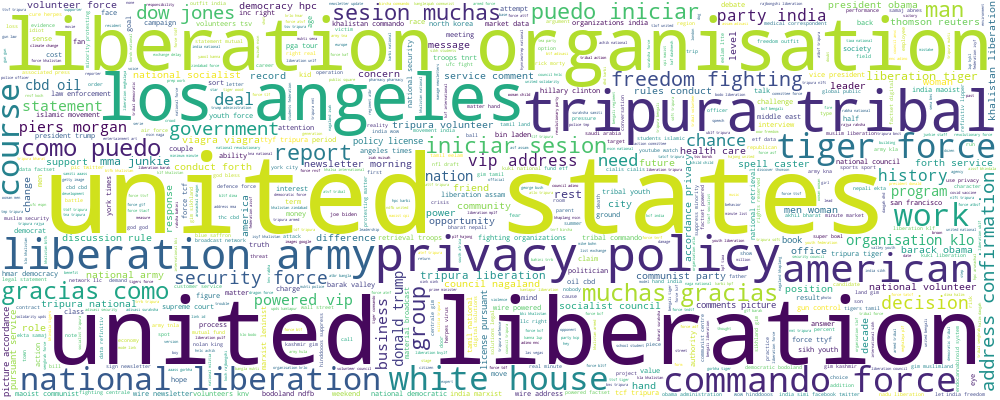

In [32]:
ready_wordlist = []
for element in df["maintext_ready"]:
    ready_wordlist.append(','.join(list(element)))

all_articles_ready = ','.join(ready_wordlist)
wordcloud.generate(all_articles_ready)

wordcloud.to_image()

# Create the Corpus

In [33]:
import gensim.corpora as corpora

In [35]:
data = df["maintext_ready"].tolist()

word_dictionary = corpora.Dictionary(data)

corpus = [word_dictionary.doc2bow(text) for text in data]   #create the corpus

df["corpus"] = corpus

In [36]:
df.head(3)

date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   

                                                 url  id  \
0  http://neighbors.denverpost.com/viewtopic.php?...   0   
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...   1   
2  https://globalpublicsquare.blogs.cnn.com/2015/...   2   

                                     maintext_prepro  \
0  neighbors » forums » general discussion » arti...   
1  brands and publishers seeking esports sponsors...   
2  for the latest updates to global public square...   

                                     tokenized_words  \
0  [Neighbors, », Forums, », General, Discussion,...   
1  [Brands, and, publishers, seeking, esports, sp...   
2  [For, the, latest, updates, to, Global, Public...   

                                      maintext_nouns  \
0  Neighbors Forums General Discussion Article Ta...   
1  Brands publisher esports sponsorship opportuni...   
2  update Global Public Square show information F...   

                                      maintext_ready  \
0  [neighbors, forums, general, discussion, talk,...   
1  [brands, publisher, esports, sponsorship, oppo...   
2  [update, global, public, square, show, fareed,...   

                                              corpus  
0  [(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2...  
1  [(24, 1), (25, 1), (26, 1), (27, 7), (28, 1), ...  
2  [(3, 1), (24, 5), (55, 1), (83, 1), (96, 1), (...

# Build a LDA model & calculate Coherence Score

In [61]:
from pprint import pprint   #pretty printing
from gensim.models import CoherenceModel

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
topic_amount_start = 10 
topic_amount_end = 200 
iteration_interval = 10

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
amount_of_topics = 0
best_coherence = 0

print(f"Calculating the optimal amount of clusters inbetween {topic_amount_start} and {topic_amount_end}.")

#Find the best possible coherence value inbetween the given min and max amount of articles. Continue with the best lda model found.
for amount_of_topics in range(topic_amount_start, topic_amount_end, iteration_interval):   
    lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = word_dictionary, num_topics = amount_of_topics)   #build the LDA model

    cm = CoherenceModel(model=lda_model, texts=df["maintext_ready"].tolist(), dictionary=word_dictionary, coherence='c_v')     #calculate coherence
    coherence = cm.get_coherence()
    print(f"Coherence with {amount_of_topics} topics: ", coherence)

    if (coherence > best_coherence):
        print("New best!")
        best_lda_model = lda_model
        best_coherence = coherence
        best_amount = amount_of_topics

print(f"Finished! Continuing with {best_amount} topic clusters. Coherence: {best_coherence}")


C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating the optimal amount of clusters inbetween 10 and 200.
Coherence with 10 topics:  0.3108446310699402
New best!
Coherence with 20 topics:  0.3046504579526259
Coherence with 30 topics:  0.321726294958078
New best!
Coherence with 40 topics:  0.3176752596167281
Coherence with 50 topics:  0.3157849688973326
Coherence with 60 topics:  0.31500196125990904
Coherence with 70 topics:  0.338938800065594
New best!
Coherence with 80 topics:  0.32715258546986214
Coherence with 90 topics:  0.3300670855386889
Coherence with 100 topics:  0.3318353682437421
Coherence with 110 topics:  0.32304830311261296
Coherence with 120 topics:  0.3335904083257316
Coherence with 130 topics:  0.32108264952937227
Coherence with 140 topics:  0.34072905975830664
New best!
Coherence with 150 topics:  0.3285707337168487
Coherence with 160 topics:  0.34287569134660306
New best!
Coherence with 170 topics:  0.33334065160626136
Coherence with 180 topics:  0.3339332560324136
Coherence with 190 topics:  0.3326485547164

# Displaying the LDA model

In [67]:
pprint(best_lda_model.print_topics())
articles_lda = best_lda_model[corpus]

[(42,
  '0.005*"california" + 0.004*"war" + 0.004*"force" + 0.004*"liberation" + '
  '0.003*"tax" + 0.003*"president" + 0.003*"obama" + 0.003*"government" + '
  '0.003*"national" + 0.002*"game"'),
 (61,
  '0.013*"child" + 0.007*"gun" + 0.005*"viagra" + 0.004*"government" + '
  '0.004*"kid" + 0.004*"woman" + 0.004*"law" + 0.003*"president" + 0.003*"man" '
  '+ 0.003*"school"'),
 (50,
  '0.005*"president" + 0.004*"group" + 0.004*"child" + 0.003*"government" + '
  '0.003*"obama" + 0.003*"service" + 0.003*"tax" + 0.003*"money" + '
  '0.003*"woman" + 0.003*"policy"'),
 (85,
  '0.007*"gun" + 0.003*"sale" + 0.003*"modi" + 0.003*"team" + 0.003*"right" + '
  '0.003*"school" + 0.003*"game" + 0.003*"force" + 0.002*"law" + '
  '0.002*"piers"'),
 (2,
  '0.005*"woman" + 0.003*"government" + 0.003*"president" + 0.003*"war" + '
  '0.003*"california" + 0.003*"force" + 0.003*"god" + 0.003*"officer" + '
  '0.003*"vaccine" + 0.002*"man"'),
 (159,
  '0.009*"game" + 0.007*"football" + 0.006*"season" + 0.004

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualize the LDA model for further analysis (needed to find the best values to adjust)

In [68]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
from IPython.display import HTML, display

pyLDAvis.enable_notebook()

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
LDAvis_data_filepath = os.path.join('./lda_results/ldavis_data_'+str(amount_of_topics)+'topics')

LDAvis_prepared = pyLDAvis.gensim_models.prepare(best_lda_model, corpus, word_dictionary)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

#load pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_data = pickle.load(f)
pyLDAvis.save_html(LDAvis_data, './lda_results/ldavis_data_'+ str(amount_of_topics) +'topics.html')
LDAvis_data #show the data

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
107    0.110639  0.008923       1        1  6.139913
74    -0.012712 -0.015501       2        1  4.566782
61    -0.019542 -0.029342       3        1  4.490593
19     0.002687  0.004021       4        1  2.250835
23    -0.071488  0.055106       5        1  2.111807
...         ...       ...     ...      ...       ...
68     0.067793  0.021708     156        1  0.060319
104    0.059323  0.007733     157        1  0.056863
24     0.080473  0.020586     158        1  0.056527
64     0.028783  0.003226     159        1  0.042258
91     0.067831  0.002902     160        1  0.035972

[160 rows x 5 columns], topic_info=             Term          Freq         Total  Category  logprob  loglift
1278        force  72195.000000  72195.000000   Default  30.0000  30.0000
825    liberation  54142.000000  54142.000000   Default  29.0000  29.0000
36572     tripura  41337.000000  41337.000000   Default  28.0000  28.0000
873      national  48634.000000  48634.000000   Default  27.0000  27.0000
282         india  43588.000000  43588.000000   Default  26.0000  26.0000
...           ...           ...           ...       ...      ...      ...
224         child     15.528775  60641.297640  Topic160  -6.1188  -0.3399
83           game     14.372925  51041.773344  Topic160  -6.1961  -0.2449
279         house     13.256601  33879.025735  Topic160  -6.2770   0.0841
486         party     12.358391  29602.441850  Topic160  -6.3471   0.1489
1312   government     12.439063  45623.454941  Topic160  -6.3406  -0.2772

[13712 rows x 6 columns], token_table=        Topic      Freq       Term
term                              
156322      9  0.651907       aaib
156322     59  0.130381       aaib
117311      2  0.088205       aaps
117311     13  0.088205       aaps
117311     27  0.264614       aaps
...       ...       ...        ...
36922     116  0.019309  回顾一周重大新闻事
36922     124  0.135164  回顾一周重大新闻事
36922     131  0.096546  回顾一周重大新闻事
36922     141  0.038618  回顾一周重大新闻事
36922     157  0.038618  回顾一周重大新闻事

[163226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[108, 75, 62, 20, 24, 42, 4, 81, 102, 160, 155, 46, 82, 158, 122, 79, 18, 40, 14, 148, 22, 117, 154, 1, 142, 55, 44, 104, 114, 8, 76, 17, 139, 13, 93, 146, 103, 133, 145, 35, 77, 56, 51, 85, 67, 147, 124, 123, 50, 121, 63, 23, 129, 113, 99, 3, 57, 80, 41, 10, 156, 53, 137, 70, 141, 9, 144, 60, 45, 68, 15, 135, 96, 95, 59, 130, 131, 66, 32, 119, 6, 125, 19, 120, 54, 136, 106, 39, 5, 88, 100, 21, 140, 58, 30, 27, 87, 116, 126, 128, 28, 36, 71, 7, 86, 37, 34, 149, 143, 97, 110, 31, 150, 49, 118, 84, 111, 72, 151, 152, 101, 38, 48, 98, 12, 47, 2, 107, 43, 127, 74, 64, 29, 33, 90, 138, 94, 91, 134, 16, 11, 61, 132, 89, 78, 73, 52, 153, 26, 157, 109, 159, 115, 83, 112, 69, 105, 25, 65, 92])

# Store Cluster IDs to dataframe

In [70]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

lda_topics = best_lda_model.show_topics(num_words=5)
for topic in lda_topics:
    print(topic)
    topics.append(preprocess_string(topic[1], filters))

(114, '0.011*"force" + 0.010*"tripura" + 0.009*"liberation" + 0.007*"national" + 0.007*"india"')
(53, '0.013*"force" + 0.007*"liberation" + 0.006*"tripura" + 0.005*"united" + 0.004*"national"')
(72, '0.011*"force" + 0.010*"herpes" + 0.008*"liberation" + 0.008*"tripura" + 0.006*"national"')
(124, '0.005*"president" + 0.005*"war" + 0.005*"school" + 0.004*"obama" + 0.003*"game"')
(133, '0.003*"viagra" + 0.003*"doctor" + 0.003*"police" + 0.003*"ufc" + 0.003*"business"')
(154, '0.010*"gun" + 0.005*"piers" + 0.004*"law" + 0.004*"god" + 0.003*"israel"')
(121, '0.027*"puedo" + 0.025*"muchas" + 0.025*"gracias" + 0.024*"como" + 0.023*"sesion"')
(34, '0.004*"game" + 0.004*"team" + 0.004*"season" + 0.004*"show" + 0.003*"golf"')
(18, '0.007*"game" + 0.003*"team" + 0.003*"war" + 0.003*"man" + 0.003*"season"')
(94, '0.006*"child" + 0.004*"sex" + 0.003*"police" + 0.003*"man" + 0.003*"force"')


C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
topic_list = []
topic_percentage_list = []
topic_keywords_list = []

for i, row in enumerate(tqdm(articles_lda)):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):   #get the dominant topic for each article
        if j == 0:  #dominant topic (only first one)
            wp = best_lda_model.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            topic_list.append(int(topic_num))
            topic_percentage_list.append(round(prop_topic,5))
            topic_keywords_list.append(topic_keywords)
        else: 
            break

df["clusterID"] = topic_list    ##the id of the topic
df["topic_percentage"] = topic_percentage_list  #how well the topic fits
df["topic_keywords"] = topic_keywords_list  #the dominant keywords for the topic

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
df.head(3)

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   

                                                 url  id  \
0  http://neighbors.denverpost.com/viewtopic.php?...   0   
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...   1   
2  https://globalpublicsquare.blogs.cnn.com/2015/...   2   

                                     maintext_prepro  \
0  neighbors » forums » general discussion » arti...   
1  brands and publishers seeking esports sponsors...   
2  for the latest updates to global public square...   

                                     tokenized_words  \
0  [Neighbors, », Forums, », General, Discussion,...   
1  [Brands, and, publishers, seeking, esports, sp...   
2  [For, the, latest, updates, to, Global, Public...   

                                      maintext_nouns  \
0  Neighbors Forums General Discussion Article Ta...   
1  Brands publisher esports sponsorship opportuni...   
2  update Global Public Square show information F...   

                                      maintext_ready  \
0  [neighbors, forums, general, discussion, talk,...   
1  [brands, publisher, esports, sponsorship, oppo...   
2  [update, global, public, square, show, fareed,...   

                                              corpus  clusterID  \
0  [(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2...        113   
1  [(24, 1), (25, 1), (26, 1), (27, 7), (28, 1), ...         69   
2  [(3, 1), (24, 5), (55, 1), (83, 1), (96, 1), (...        119   

   topic_percentage                                     topic_keywords  
0           0.77465  god, force, liberation, national, iran, tripur...  
1           0.99714  force, house, national, united, right, china, ...  
2           0.72329  islam, oink, trump, die, islamic, pigs, obama,...

In [73]:
def getMonthYear(s):
     return s.split('-')[0]+"-"+s.split('-')[1]

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
import datetime as dt

df['date_publish'] = pd.to_datetime(df['date_publish'])
df['date_modify'] = pd.to_datetime(df['date_modify'])
df['date_modify'] = df['date_modify'].dt.strftime('%m/%d/%Y, %H:%M:%S')
df['date_download'] = pd.to_datetime(df['date_download'])
df['date_download'] = df['date_download'].dt.strftime('%m/%d/%Y, %H:%M:%S')
df['month_year'] = df['date_publish'].apply(lambda x: getMonthYear(str(x)))
df['date_publish'] = df['date_publish'].dt.strftime('%m/%d/%Y, %H:%M:%S')
df.head(3)

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   

                                                 url  id  \
0  http://neighbors.denverpost.com/viewtopic.php?...   0   
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...   1   
2  https://globalpublicsquare.blogs.cnn.com/2015/...   2   

                                     maintext_prepro  \
0  neighbors » forums » general discussion » arti...   
1  brands and publishers seeking esports sponsors...   
2  for the latest updates to global public square...   

                                     tokenized_words  \
0  [Neighbors, », Forums, », General, Discussion,...   
1  [Brands, and, publishers, seeking, esports, sp...   
2  [For, the, latest, updates, to, Global, Public...   

                                      maintext_nouns  \
0  Neighbors Forums General Discussion Article Ta...   
1  Brands publisher esports sponsorship opportuni...   
2  update Global Public Square show information F...   

                                      maintext_ready  \
0  [neighbors, forums, general, discussion, talk,...   
1  [brands, publisher, esports, sponsorship, oppo...   
2  [update, global, public, square, show, fareed,...   

                                              corpus  clusterID  \
0  [(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2...        113   
1  [(24, 1), (25, 1), (26, 1), (27, 7), (28, 1), ...         69   
2  [(3, 1), (24, 5), (55, 1), (83, 1), (96, 1), (...        119   

   topic_percentage                                     topic_keywords  \
0           0.77465  god, force, liberation, national, iran, tripur...   
1           0.99714  force, house, national, united, right, china, ...   
2           0.72329  islam, oink, trump, die, islamic, pigs, obama,...   

  month_year  
0    2021-06  
1    2021-06  
2    2021-06

In [75]:
#df = df.drop(columns=["maintext_prepro", "tokenized_words", "maintext_nouns", "maintext_ready", "corpus", "id"], errors='ignore')
df.head()

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date_download           date_modify          date_publish  \
0  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:15   
1  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 10:50:55   
2  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 12:45:16   
3  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:08:18   
4  07/14/2021, 01:00:35  07/14/2021, 01:00:35  06/12/2021, 11:09:30   

                                         description language  \
0  Neighbors » Forums » General Discussion » Arti...       en   
1  Brands and publishers seeking esports sponsors...       en   
2  For the latest updates to Global Public Square...       en   
3  Skip to main content Published: Jan 23, 2019 B...       en   
4  One of artist Shepard Fairey's next projects c...       en   

                      source_domain  \
0          neighbors.denverpost.com   
1                  deloitte.wsj.com   
2  globalpublicsquare.blogs.cnn.com   
3           jobs.washingtonpost.com   
4          latimesblogs.latimes.com   

                                            maintext  \
0  Neighbors » Forums » General Discussion » Arti...   
1  Brands and publishers seeking esports sponsors...   
2  For the latest updates to Global Public Square...   
3  Skip to main content Published: Jan 23, 2019By...   
4   One of artist Shepard Fairey's next projects ...   

                                               title  \
0  Colorado poll: Majority favor allowing staff t...   
1   Esports on the Rise: Evaluating Brand ROI - C...   
2  Global Public Square has moved – Global Public...   
3           How Much Salary Negotiation Is Too Much?   
4  Shepard Fairey puts services up for auction | ...   

                                                 url  id  \
0  http://neighbors.denverpost.com/viewtopic.php?...   0   
1  https://deloitte.wsj.com/cmo/2020/05/05/esport...   1   
2  https://globalpublicsquare.blogs.cnn.com/2015/...   2   
3  https://jobs.washingtonpost.com/article/how-mu...   3   
4  https://latimesblogs.latimes.com/culturemonste...   4   

                                     maintext_prepro  \
0  neighbors » forums » general discussion » arti...   
1  brands and publishers seeking esports sponsors...   
2  for the latest updates to global public square...   
3  skip to main content published: jan 23 2019by ...   
4   one of artist shepard fairey's next projects ...   

                                     tokenized_words  \
0  [Neighbors, », Forums, », General, Discussion,...   
1  [Brands, and, publishers, seeking, esports, sp...   
2  [For, the, latest, updates, to, Global, Public...   
3  [Skip, to, main, content, Published, :, Jan, 2...   
4  [One, of, artist, Shepard, Fairey, 's, next, p...   

                                      maintext_nouns  \
0  Neighbors Forums General Discussion Article Ta...   
1  Brands publisher esports sponsorship opportuni...   
2  update Global Public Square show information F...   
3  Skip content Jan Arden Davidson salary balanci...   
4  artist Shepard Fairey project portrait Los Ang...   

                                      maintext_ready  \
0  [neighbors, forums, general, discussion, talk,...   
1  [brands, publisher, esports, sponsorship, oppo...   
2  [update, global, public, square, show, fareed,...   
3  [skip, arden, davidson, salary, balancing, act...   
4  [artist, shepard, fairey, project, portrait, l...   

                                              corpus  clusterID  \
0  [(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2...        113   
1  [(24, 1), (25, 1), (26, 1), (27, 7), (28, 1), ...         69   
2  [(3, 1), (24, 5), (55, 1), (83, 1), (96, 1), (...        119   
3  [(33, 1), (43, 1), (172, 1), (182, 1), (212, 1...        148   
4  [(168, 1), (188, 1), (212, 1), (224, 2), (271,...          2   

   topic_percentage                                     topic_keywords  \
0           0.77465  god, force, liberation, national, iran, tripur...   
1           0.99714  fo

In [76]:
import json

for cluster_id, data in df.groupby(df.clusterID):
    item = data.topic_keywords.iloc[0].split(",")
    os.makedirs(f'./clustered_json/cluster_{cluster_id}-{item[0]}_{item[1]}_{item[2]}')
    for date, date_data in data.groupby(data.month_year):
             json_data = date_data.to_json(orient='records', force_ascii=False, date_format='iso', date_unit='s')
             parsed = json.loads(json_data)
             with open(f'./clustered_json/cluster_{cluster_id}-{item[0]}_{item[1]}_{item[2]}/{date}.json', 'w', encoding='utf-8') as f:
                 f.write(json.dumps({"data": parsed}, indent=4, ensure_ascii=False))

C:\Users\snake\miniconda3\envs\kccs\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
